<a href="https://colab.research.google.com/github/xCHMNx/Math152/blob/main/Exploration1_Unicorns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The $3n+1$ Conjecture

Authored by Wyeth Levi, Colin Harmon, and Cassandra Jensen

The basis of this project is a simple algorithm. Given a positive integer $n$, if the integer is even, we will divide it by $2$. If odd, we will multiply by $3$ and add $1$. When we do this a certain number of times, according to the Collatz Conjecture, the algorithm will always converge to a pattern of $4,2,1,4,2,1...$, though this has not been formally proved. Below is the basic, un-optimized algorithm. Later we will modify it to let us explore the conjecture in greater detail.

In [1]:
'''This is the initial algorithm'''
def conjecture(n):
  n_0 = n
  while n != 1:
    print("The value is now: ", n)
    if n %2 == 0:
      n = n//2
    else:
      n = 3*n + 1
  print("Finally the value is: ",n)

And so now we can see that the pattern we were expecting appears. As requested by the assignment directions, we will see if this pattern arises for very large numbers.

In [2]:
conjecture(1000000)

The value is now:  1000000
The value is now:  500000
The value is now:  250000
The value is now:  125000
The value is now:  62500
The value is now:  31250
The value is now:  15625
The value is now:  46876
The value is now:  23438
The value is now:  11719
The value is now:  35158
The value is now:  17579
The value is now:  52738
The value is now:  26369
The value is now:  79108
The value is now:  39554
The value is now:  19777
The value is now:  59332
The value is now:  29666
The value is now:  14833
The value is now:  44500
The value is now:  22250
The value is now:  11125
The value is now:  33376
The value is now:  16688
The value is now:  8344
The value is now:  4172
The value is now:  2086
The value is now:  1043
The value is now:  3130
The value is now:  1565
The value is now:  4696
The value is now:  2348
The value is now:  1174
The value is now:  587
The value is now:  1762
The value is now:  881
The value is now:  2644
The value is now:  1322
The value is now:  661
The value is 

At the very end, we see it outputs the expected pattern $4,2,1$. 

Another aspect we want to look at is the time it takes for such a program to run. So that we do not overload the reader with many lines printing out values, we will remove the print statements from the function. This will allow the %timeit function to show us the runtime and not give information that is not currently relevant. 

In [3]:
def conjecture(n):
  n_0 = n
  num_loops = 0
  while n != 1:
    if num_loops > 10**6: # If our while loop has run this long, we may have found a counter-example to the conjecture
      print("We haven't reached 1 in 1 million steps.")
      return False
    if n %2 == 0:
      n = n//2
    else:
      n = 3*n + 1
    num_loops += 1
  return True

In [4]:
import time
%timeit conjecture(1000000)

10000 loops, best of 5: 24.5 µs per loop


## Testing the first $10^6$ integers
We now want to explore whether this conjecture is at least plausibly true. That is, we are going to check the first $10^6$ positive integers to see whether the Collatz conjecture holds or not. This is by no means a proof, but if we do not find a counter-example in $10^6$ integers, then it is at least not obviously false.

In [5]:
N = 10**6
# We want to check the conjecture for all numbers up to N
num_follow_conjecture = 0
for i in range(1, N+1, 1):
  if conjecture(i):
    num_follow_conjecture += 1
print("{:d} of the first {:d} numbers tested follow the Collatz conjecture.".format(num_follow_conjecture, N))

1000000 of the first 1000000 numbers tested follow the Collatz conjecture.


We see that every one of the first 1 million positive integers follows the Collatz Conjecture. That is, by following the rules of the $3n+1$ problem, every single one of them eventually finds its way to the loop $4, 2, 1, 4, 2, 1,\dots$

###Edge case: $0$
The actual Collatz conjecture is limited to positive intigers, which does not include $0$. But, because we are going to be testing out various inputs, it might be worth mentioning the edge case of $n=0$. It is not necessary to run the code, however for good measure it is done below. Because $0$ is even, and $0$ divided by 2 will be $0$, we effectively end up in an infinite loop that will just keep divining $0$ by $2$. 

In [6]:
conjecture(0)

We haven't reached 1 in 1 million steps.


False

And thus we see that the pattern never arises when we use $0$.

## Negative numbers

Here we explore the behavior of negative inputs to the $3n+1$ conjecture.

The function below allows us to explore the patterns of a given input without risk of getting stuck in an infinite loop. Instead, we simply explore the progression for a certain number of iterations.

In [7]:
#This algorithm is safe to use to explore, as it will only go for a certain number of loops
def limited_conjecture(n, loops):
  n_0 = n
  num_loops = 0
  while n != 1:
    num_loops += 1
    if num_loops > loops:
      return
    print("The value is now: ", n)
    if n %2 == 0:
      n = n//2
    else:
      n = 3*n + 1

In [8]:
limited_conjecture(-17, 20)

The value is now:  -17
The value is now:  -50
The value is now:  -25
The value is now:  -74
The value is now:  -37
The value is now:  -110
The value is now:  -55
The value is now:  -164
The value is now:  -82
The value is now:  -41
The value is now:  -122
The value is now:  -61
The value is now:  -182
The value is now:  -91
The value is now:  -272
The value is now:  -136
The value is now:  -68
The value is now:  -34
The value is now:  -17
The value is now:  -50


Notice that by the nature of the conjecture, any power of 2 will automatically fall down to the value 2 by repeated division by 2. This then falls into the loop $-2, -1, -2,\dots$ which is a loop of length 2 which didn't exist for the positive integers.

When we look at the behavior of -5 in the conjecture, we see that a new loop appears. This loop follows the pattern $-5, -14, -7, -20, -10, -5, \dots$ This is a loop of length 5.

Testing -17, we get a different loop again. This loop is even longer, with 18 numbers, following the pattern $-17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34, -17, \dots$.

### An observation about the negative integers

We see that when we run the conjecture on the value of -1, we immediately fall into the loop $-1, -2, -1, \dots$ mentioned above. Then, running the conjecture on an input incremented by -14, i.e. -15, it seems that the process eventually converges to that same loop. Testing the first few options, we see that $-15, -29, -43, -57,\dots$ all follow the same pattern.

We hypothesize that this is true in general. That is, that any number congruent to -1 modulo 14 will converge to the loop $-1, -2, -1, \dots$ eventually.

To test this theory, the function below checks the first k numbers congruent to -1 mod 14 and sees if they converge to the same loop.

In [9]:
def test_values_mod_14(k):
  """
  Check first k numbers congruent to -1 mod 14
  """
  for k in range(-1, -14*k, -14):
    num_loops = 0
    follows_pattern = True
    n = k
    while n != -1:
      if num_loops > 10**6: # If our while loop has run this long, we may have found a counter-example to the conjecture
        follows_pattern = False
        break
      if n %2 == 0:
        n = n//2
      else:
        n = 3*n + 1
      num_loops += 1
    print("{}: {}".format(k, follows_pattern))

In [10]:
test_values_mod_14(25)

-1: True
-15: True
-29: True
-43: True
-57: True
-71: True
-85: True
-99: False
-113: True
-127: True
-141: True
-155: True
-169: True
-183: True
-197: False
-211: True
-225: False
-239: False
-253: True
-267: False
-281: False
-295: False
-309: True
-323: False
-337: False


We see that our conjecture that all values congruent to -1 modulo 14 converge to the loop $-2, -1, -2,\dots$ is false by counterexample. The first value for which this fails is -99. Interestingly though, it holds for 13 of the first 14 examples.

We haven't been able to find loops in the negative numbers other than these three, nor any loops in the positive numbers other than just the one, so we theorize that there exist three loops in the negative integers and just the one in the positive integers (re-stating the Collatz conjecture).

To explore these claims, we consider a more thorough search for patterns...

## Checking for patterns on a larger scale
We've found three loops in the negative integers and one loop in the positive integers, but we want to see whether there are any other obvious loops in either the negative numbers or the positive numbers, the function below checks.

In [11]:
def check_for_patterns(n):
  """
  Checks all numbers between 1 and n if n is positive, -1 and n if n is negative, and returns the number of patterns found, along with 
  a list of all patterns found.
  Uses the standard rule 3n+1
  """
  num_patterns = 0
  characteristics = []
  full_patterns = []
  inc = 1
  if n < 0:
    inc = -1
  for i in range(inc, n, inc):
    progression = []
    value = i
    while True:
      # If the value is a part of a pattern already noted
      # then break and do nothing
      if value in characteristics:
        break
      # else if the value has been seen already in the progression
      # we've found a loop and it hasn't been found before since
      # our loop would have broken due to the above condition first
      elif value in progression:
        num_patterns += 1
        characteristics.append(value)
        # Extract the whole loop
        ind = progression.index(value)
        full_patterns.append(progression[ind:])
        break
      # else, keep building up the current progression
      else:
        progression.append(value)
      # Perform the rules of 3n+1
      if value %2 == 0:
        value = value//2
      else:
        value = 3*value + 1
  # We've checked the first n values
  return num_patterns, full_patterns

Using the above function, we check for patterns in the first 10,000 positive integers, and the first 10,000 negative integers.

The code below performs this check and then prints out both the number of patterns found and the patterns themselves.

In [12]:
num_to_check = 10000
pattern_num, full_patterns = check_for_patterns(num_to_check)
print("We found {:d} pattern(s) while checking the positive integers from 1 to {:d}".format(pattern_num, num_to_check))
print("Here are the patterns we found:")
# Print the patterns found above
for i in range(len(full_patterns)):
  for j in range(len(full_patterns[i])):
    if j == 0:
      print("   " + str(full_patterns[i][j]), end=", ")
    elif j == len(full_patterns[i]) - 1:
      print(str(full_patterns[i][j]) + "...")
    else:
      print(full_patterns[i][j], end=", ")
print()
pattern_num, full_patterns = check_for_patterns(-1*num_to_check)
print("We found {:d} pattern(s) while checking the negative integers from -1 to {:d}".format(pattern_num, -1*num_to_check))
print("Here are the patterns we found:")
# Print the patterns found above
for i in range(len(full_patterns)):
  for j in range(len(full_patterns[i])):
    if j == 0:
      print("   " + str(full_patterns[i][j]), end=", ")
    elif j == len(full_patterns[i]) - 1:
      print(str(full_patterns[i][j]) + "...")
    else:
      print(full_patterns[i][j], end=", ")
print()

We found 1 pattern(s) while checking the positive integers from 1 to 10000
Here are the patterns we found:
   1, 4, 2...

We found 3 pattern(s) while checking the negative integers from -1 to -10000
Here are the patterns we found:
   -1, -2...
   -5, -14, -7, -20, -10...
   -17, -50, -25, -74, -37, -110, -55, -164, -82, -41, -122, -61, -182, -91, -272, -136, -68, -34...



These are exactly the loops we found previously, and there seem to be no others, at least in the first 10,000 integers. This seems to back up our claim.

These results are interesting because the key aspect of the behavior of the $3n+1$ conjecture on the positive integers is that they all converge to the same loop eventually. This is clearly not true of the negative integers, as we've found by checking the first 10000 integers that there are at least three such loops that negative integers can converge to.

## Visualizing the $3n+1$ progression

In [13]:
import matplotlib.pyplot as plt
import numpy as np

The function below returns a list containing the first n numbers generated from the starting number using the rules of the conjecture. This is useful for when one wants to do further visualizations with the numbers.

In [14]:
def generate_first_n(start, n):
  """
  Return the first n numbers generated by the 3n+1 conjecture
  """
  conjecture_val = start
  nums = []
  for i in range(n):
    #print("The value is now: ", n)
    nums.append(conjecture_val)
    if conjecture_val %2 == 0:
      conjecture_val = conjecture_val//2
    else:
      conjecture_val = 3*conjecture_val + 1
  return nums

In [16]:
# An example of the function generating the first 10 terms in the progression beginning
# with 5
print(generate_first_n(-5, 10))

[-5, -14, -7, -20, -10, -5, -14, -7, -20, -10]


Let's visualize the path a certain integer takes before it ends up in one of the loops. We do this using `matplotlib`. The function below generates a plot and fills it with the first n values in the progression beginning with the given starting value. It draws dashed lines between points to show the order in which they are generated.

In [17]:
def visualize_conjecture(start, n):
  # Get the first number_to_plot values in the sequence starting at start
  sequence = np.array(generate_first_n(start, n))
  # Setup a plot
  fig, ax = plt.subplots(1, 1)
  fig.set_size_inches(15, 8)
  # Plot steps in sequence with dashed line to show progression
  ax.plot(np.arange(1, n+1, 1), sequence, marker='o', linestyle='dashed')
  plt.xlabel("Steps")
  plt.ylabel("Value in sequence")
  plt.title("The first {} steps of the conjecture starting at {}".format(n, start))
  plt.show()

Let's take two interesting examples. The first is the starting seed 61. This progression takes about 20 steps to reach the loop $1, 4,2\dots$ and its maximum attained value is just above 175. The plot below shows the pattern this starting value generates.

The second example, the second plot shown below, uses a seed of 62. As seen in the plot below, this progression takes a large number of steps up and down before eventually converging to the loop $1, 4,2\dots$ We can see that it takes around 100 steps before it reaches this loop and attains a maximum value of over 8000 on the way. This pattern stemmed from an initial value just slightly larger than the first, and yet the pattern it generated is wildly different. This is an interesting thing to note about sequences generated by $3n+1$, namely that very close initial values can generate very different sequences.

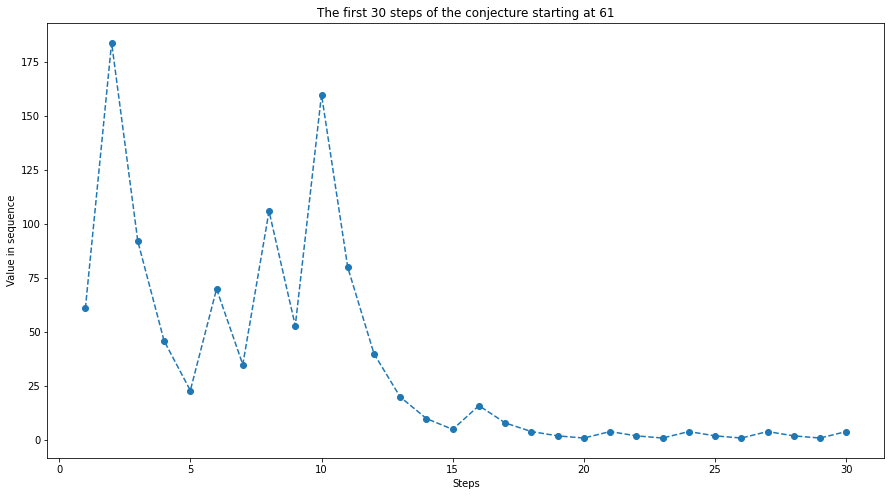

In [18]:
visualize_conjecture(61, 30)

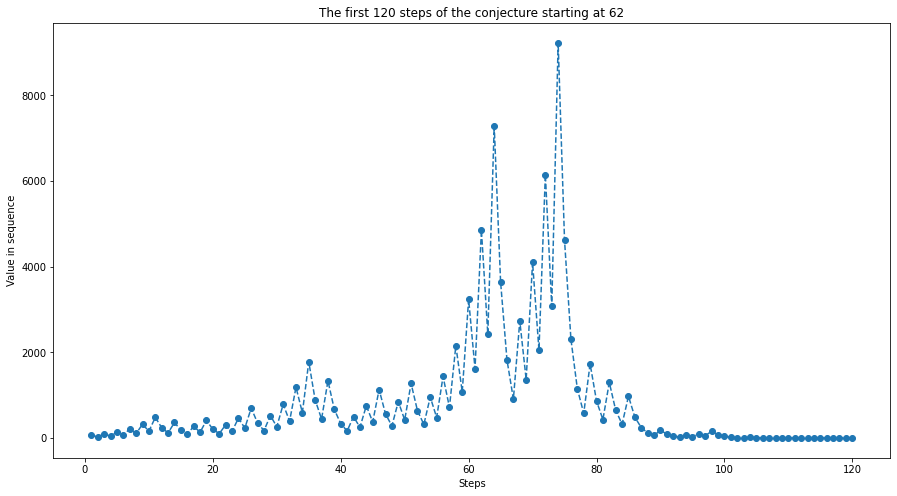

In [19]:
visualize_conjecture(62, 120)

## Dropping time
Next, we explore the behavior of the dropping time $\sigma(n)$ as a function of $n$. The dropping time is defined as the number of iterations of the $3n+1$ rules before a number is generated which is smaller than the original value $n$.

In [20]:
def dropping_time(n):
  """
  Use a while loop to determine the number of iterations of the rules of the 
  3n+1 problem it takes before the generated value is smaller than the original.
  """
  n_0 = n
  # If the input is one, return None
  if n==1:
    return None
  # Count the number of times through the loop
  num_loops = 0
  # While the current value is larger than or equal to the original, keep 
  # performing the rules of the 3n+1 problem.
  # Once the current value is smaller, return the number of loops it took to get there
  while n >= n_0:
    if n % 2 == 0:
      n = n//2
    else:
      n = 3*n + 1
    num_loops += 1
  return num_loops

Below, we test that our code returns the proper value for the dropping time of 17.

In [21]:
print(dropping_time(17))

3


Here is a function to test only integers up to a $n$ congruent to a certain value modulo another.

In [28]:
def dropping_time_congruent_mod(n, a, b):
  """
  Tests the dropping time of all integers up to n congruent to a mod b
  """
  # The dropping time of 1 is undefined, so if a is 1, 
  # start at the next value congruent to 1 mod b
  if a == 1:
    start = 1 + b
  else:
    start = a
  # Increment by b to get all values congruent to a mod b
  for i in range(start, n, b):
    print("{}: Dropping time {}".format(i, dropping_time(i)))

### Visualization of Dropping Times

In [23]:
def visualize_dropping_times(n):
  num_digits = len(str(n))
  for i in range(2, n+1, 1):
    print("{:>{num}d}:".format(i, num=num_digits), end=" ")
    print("#"*dropping_time(i))
    #print(dropping_time(i))

In [24]:
visualize_dropping_times(100)

  2: #
  3: ######
  4: #
  5: ###
  6: #
  7: ###########
  8: #
  9: ###
 10: #
 11: ########
 12: #
 13: ###
 14: #
 15: ###########
 16: #
 17: ###
 18: #
 19: ######
 20: #
 21: ###
 22: #
 23: ########
 24: #
 25: ###
 26: #
 27: ################################################################################################
 28: #
 29: ###
 30: #
 31: ###########################################################################################
 32: #
 33: ###
 34: #
 35: ######
 36: #
 37: ###
 38: #
 39: #############
 40: #
 41: ###
 42: #
 43: ########
 44: #
 45: ###
 46: #
 47: ########################################################################################
 48: #
 49: ###
 50: #
 51: ######
 52: #
 53: ###
 54: #
 55: ########
 56: #
 57: ###
 58: #
 59: ###########
 60: #
 61: ###
 62: #
 63: ########################################################################################
 64: #
 65: ###
 66: #
 67: ######
 68: #
 69: ###
 70: #
 71: ########################

### Dropping Time and Congruence modulo 8
Let's consider how the dropping time of a number is related to its value modulo 8. First of all, any even number clearly has a dropping time of 1, since the first operation performed is to divide by 2, making the number smaller after just 1 step. Therefore, any number which is congruent to 0, 2, 4, or 6 modulo 8 will have a dropping time of one.

#### Congruent to 1 modulo 8
What happens when numbers are congruent to 1 modulo 8?

In [25]:
dropping_time_congruent_mod(1000, 1, 8)

9: Dropping time 3
17: Dropping time 3
25: Dropping time 3
33: Dropping time 3
41: Dropping time 3
49: Dropping time 3
57: Dropping time 3
65: Dropping time 3
73: Dropping time 3
81: Dropping time 3
89: Dropping time 3
97: Dropping time 3
105: Dropping time 3
113: Dropping time 3
121: Dropping time 3
129: Dropping time 3
137: Dropping time 3
145: Dropping time 3
153: Dropping time 3
161: Dropping time 3
169: Dropping time 3
177: Dropping time 3
185: Dropping time 3
193: Dropping time 3
201: Dropping time 3
209: Dropping time 3
217: Dropping time 3
225: Dropping time 3
233: Dropping time 3
241: Dropping time 3
249: Dropping time 3
257: Dropping time 3
265: Dropping time 3
273: Dropping time 3
281: Dropping time 3
289: Dropping time 3
297: Dropping time 3
305: Dropping time 3
313: Dropping time 3
321: Dropping time 3
329: Dropping time 3
337: Dropping time 3
345: Dropping time 3
353: Dropping time 3
361: Dropping time 3
369: Dropping time 3
377: Dropping time 3
385: Dropping time 3
393: 

Checking all values up to 1000, it seems that a number congruent to 1 modulo 8 will always have a dropping time of 3. In fact, we can show that this is the case.

Consider an arbitrary integer $n>0$ where $n$ is congruent to 1 modulo 8. That is, we have $n=8k+1$ for some integer $k\geq 0$. Now, $n$ is odd, so the first iteration of the $3n+1$ problem will return $n'=3n+1=3(8k+1)+1=24k+4$. But we can factor $n'$ as $4(6k+1)$. This number is larger than $n$, since we multiplied by 3 and added 1. Clearly, this is an even number, so in the next step we divide by 2 to get $n''=\frac{n'}{2}=2(6k+1)$. This number is also larger than the original, since is evaluates to $12k+2$, and this is bigger than $8k+1$. Again, we have an even value, so we divide by 2 to get $n'''=\frac{n''}{2}=6k+1$. We are now three steps deep into the evaluation, and notice that we have obtained a number, $6k+1$, which is guaranteed to be smaller than the value we started with, namely $8k+1$. Also, neither of the previous two values could be smaller than the original. Thus, we've found that the dropping time of an integer $n$ which is congruent to 1 modulo 8 must be 3.

#### Congruent to 3 modulo 8
Let's next consider numbers congruent to 3 modulo 8.

In [29]:
dropping_time_congruent_mod(1000, 3, 8)

3: Dropping time 6
11: Dropping time 8
19: Dropping time 6
27: Dropping time 96
35: Dropping time 6
43: Dropping time 8
51: Dropping time 6
59: Dropping time 11
67: Dropping time 6
75: Dropping time 8
83: Dropping time 6
91: Dropping time 73
99: Dropping time 6
107: Dropping time 8
115: Dropping time 6
123: Dropping time 13
131: Dropping time 6
139: Dropping time 8
147: Dropping time 6
155: Dropping time 65
163: Dropping time 6
171: Dropping time 8
179: Dropping time 6
187: Dropping time 11
195: Dropping time 6
203: Dropping time 8
211: Dropping time 6
219: Dropping time 13
227: Dropping time 6
235: Dropping time 8
243: Dropping time 6
251: Dropping time 44
259: Dropping time 6
267: Dropping time 8
275: Dropping time 6
283: Dropping time 39
291: Dropping time 6
299: Dropping time 8
307: Dropping time 6
315: Dropping time 11
323: Dropping time 6
331: Dropping time 8
339: Dropping time 6
347: Dropping time 16
355: Dropping time 6
363: Dropping time 8
371: Dropping time 6
379: Dropping ti

These numbers are a lot less consistent. There doesn't seem to be an obvious pattern to the dropping time for these values. Again, this makes sense because a similar analysis to the one we did for numbers congruent to 1 modulo 8 doesn't give us a conclusive answer. There is not one value that always must be obtained for the dropping time of integers congruent to 3 modulo 8.

#### Congruent to 5 modulo 8

Next, we investigate the dropping times of numbers congruent to 5 modulo 8.

Before we run any experiments, we can again consider an analysis for arbitrary integer $n>0$ such that $n\equiv 5 \mod 8$. That is, $n=8k+5$ for some $k\geq 0$. Clearly, $n$ is odd, so we first multiply by 3 and add 1 to get $n'=24k+16$. Then, we factor this as $n'=8(3k+2)$. This has three factors of 2 in it, so our next three steps will be to divide by 2. That is, $n''=4(3k+2)$, then $n^{(3)}=2(3k+2)$. As we mentioned, we could keep going. However, notice that $n^{(3)}=2(3k+2)=6k+4$ is always going to be smaller than $n=8k+5$. Since we are talking about positive integers, the smallest value $k$ can hold is 0. But if $k$ is 0, then $n$ is still larger than $n^{(3)}$. As $n$ increases in size, $k$ increases as well, but $8k+5$ grows faster than $6k+4$, meaning $6k+4$ will always be smaller. Thus, the dropping time for any integer congruent to 5 modulo 8 should be 3.

Indeed, the code below confirms this analysis.

In [30]:
dropping_time_congruent_mod(1000, 5, 8)

5: Dropping time 3
13: Dropping time 3
21: Dropping time 3
29: Dropping time 3
37: Dropping time 3
45: Dropping time 3
53: Dropping time 3
61: Dropping time 3
69: Dropping time 3
77: Dropping time 3
85: Dropping time 3
93: Dropping time 3
101: Dropping time 3
109: Dropping time 3
117: Dropping time 3
125: Dropping time 3
133: Dropping time 3
141: Dropping time 3
149: Dropping time 3
157: Dropping time 3
165: Dropping time 3
173: Dropping time 3
181: Dropping time 3
189: Dropping time 3
197: Dropping time 3
205: Dropping time 3
213: Dropping time 3
221: Dropping time 3
229: Dropping time 3
237: Dropping time 3
245: Dropping time 3
253: Dropping time 3
261: Dropping time 3
269: Dropping time 3
277: Dropping time 3
285: Dropping time 3
293: Dropping time 3
301: Dropping time 3
309: Dropping time 3
317: Dropping time 3
325: Dropping time 3
333: Dropping time 3
341: Dropping time 3
349: Dropping time 3
357: Dropping time 3
365: Dropping time 3
373: Dropping time 3
381: Dropping time 3
389: 

#### Congruent to 7 modulo 8

Next, we investigate the dropping times of numbers congruent to 7 modulo 8.

In this case, as in the case of numbers congruent to 3 modulo 8, there is no obvious pattern. An analysis of an arbitrary number congruent to 7 modulo 8 doesn't give us a conclusive answer. We can see from the code below that, for example, 55 has a dropping time of 8, but 63, the next integer we check, has a dropping time of 88!

In [31]:
dropping_time_congruent_mod(1000, 7, 8)

7: Dropping time 11
15: Dropping time 11
23: Dropping time 8
31: Dropping time 91
39: Dropping time 13
47: Dropping time 88
55: Dropping time 8
63: Dropping time 88
71: Dropping time 83
79: Dropping time 13
87: Dropping time 8
95: Dropping time 13
103: Dropping time 68
111: Dropping time 50
119: Dropping time 8
127: Dropping time 24
135: Dropping time 11
143: Dropping time 11
151: Dropping time 8
159: Dropping time 34
167: Dropping time 47
175: Dropping time 13
183: Dropping time 8
191: Dropping time 21
199: Dropping time 13
207: Dropping time 21
215: Dropping time 8
223: Dropping time 50
231: Dropping time 19
239: Dropping time 32
247: Dropping time 8
255: Dropping time 21
263: Dropping time 11
271: Dropping time 11
279: Dropping time 8
287: Dropping time 16
295: Dropping time 13
303: Dropping time 21
311: Dropping time 8
319: Dropping time 34
327: Dropping time 34
335: Dropping time 13
343: Dropping time 8
351: Dropping time 13
359: Dropping time 26
367: Dropping time 16
375: Droppin

### Dropping Time and Congruence modulo 16
Let's now consider how the dropping time of a number is related to its value modulo 16. Again, any even number clearly has a dropping time of 1, since the first operation performed is to divide by 2, making the number smaller after just 1 step. Therefore, any number which is congruent to 0, 2, 4, 6, 8, 10, 12, or 14 modulo 16 will have a dropping time of one.

#### Congruent to 1 modulo 16

First, let's see what happens to numbers congruent to 1 modulo 16.

If we perform an analogue of the same process we've done in the scenario with 8, we find that these numbers should always drop in 3 steps. Indeed, they do so.

In [32]:
dropping_time_congruent_mod(1000, 1, 16)

17: Dropping time 3
33: Dropping time 3
49: Dropping time 3
65: Dropping time 3
81: Dropping time 3
97: Dropping time 3
113: Dropping time 3
129: Dropping time 3
145: Dropping time 3
161: Dropping time 3
177: Dropping time 3
193: Dropping time 3
209: Dropping time 3
225: Dropping time 3
241: Dropping time 3
257: Dropping time 3
273: Dropping time 3
289: Dropping time 3
305: Dropping time 3
321: Dropping time 3
337: Dropping time 3
353: Dropping time 3
369: Dropping time 3
385: Dropping time 3
401: Dropping time 3
417: Dropping time 3
433: Dropping time 3
449: Dropping time 3
465: Dropping time 3
481: Dropping time 3
497: Dropping time 3
513: Dropping time 3
529: Dropping time 3
545: Dropping time 3
561: Dropping time 3
577: Dropping time 3
593: Dropping time 3
609: Dropping time 3
625: Dropping time 3
641: Dropping time 3
657: Dropping time 3
673: Dropping time 3
689: Dropping time 3
705: Dropping time 3
721: Dropping time 3
737: Dropping time 3
753: Dropping time 3
769: Dropping time 

#### Congruent to 3 modulo 16

Next, we investigate the dropping times of numbers congruent to 3 modulo 16.

Let's follow a number $n>0$ such that $n\equiv 3\mod 16$. Then $n=16k+3$ for some $k\geq 0$. This is odd, so $n'=3n+1=48k+10$. This can be factored as $2(24k+5)$, so $n'$ is even. Then, $n''=24k+5$. Again, this is odd, so $n^{(3)}=3n''+1=72k+16$. We can factor out 8 from this to get $8(9k+2)$. Therefore, the next three operations are to divide by 2. We get $n^{(4)}=4(9k+2)$, then $n^{(5)}=2(9k+2)$, and finally $n^{(6)}=9k+2$. Notice that $n^{(5)}$, which is $18k+4$, is still larger than $n$ regardless of $k$, but $n^{(6)}$ is always smaller. In fact, it is the first one which is smaller. Therefore, in all cases, we should obtain a dropping time of 6 for numbers congruent to 3 modulo 16.

The code below confirms this logic.

In [33]:
dropping_time_congruent_mod(1000, 3, 16)

3: Dropping time 6
19: Dropping time 6
35: Dropping time 6
51: Dropping time 6
67: Dropping time 6
83: Dropping time 6
99: Dropping time 6
115: Dropping time 6
131: Dropping time 6
147: Dropping time 6
163: Dropping time 6
179: Dropping time 6
195: Dropping time 6
211: Dropping time 6
227: Dropping time 6
243: Dropping time 6
259: Dropping time 6
275: Dropping time 6
291: Dropping time 6
307: Dropping time 6
323: Dropping time 6
339: Dropping time 6
355: Dropping time 6
371: Dropping time 6
387: Dropping time 6
403: Dropping time 6
419: Dropping time 6
435: Dropping time 6
451: Dropping time 6
467: Dropping time 6
483: Dropping time 6
499: Dropping time 6
515: Dropping time 6
531: Dropping time 6
547: Dropping time 6
563: Dropping time 6
579: Dropping time 6
595: Dropping time 6
611: Dropping time 6
627: Dropping time 6
643: Dropping time 6
659: Dropping time 6
675: Dropping time 6
691: Dropping time 6
707: Dropping time 6
723: Dropping time 6
739: Dropping time 6
755: Dropping time 6


#### Congruent to 5 modulo 16

Now consider numbers congruent to 5 modulo 16.

A similar analysis, and the code below, agree that these numbers should have a dropping time of 3, like in the case of numbers congruent to 1 modulo 16.

In [34]:
dropping_time_congruent_mod(1000, 5, 16)

5: Dropping time 3
21: Dropping time 3
37: Dropping time 3
53: Dropping time 3
69: Dropping time 3
85: Dropping time 3
101: Dropping time 3
117: Dropping time 3
133: Dropping time 3
149: Dropping time 3
165: Dropping time 3
181: Dropping time 3
197: Dropping time 3
213: Dropping time 3
229: Dropping time 3
245: Dropping time 3
261: Dropping time 3
277: Dropping time 3
293: Dropping time 3
309: Dropping time 3
325: Dropping time 3
341: Dropping time 3
357: Dropping time 3
373: Dropping time 3
389: Dropping time 3
405: Dropping time 3
421: Dropping time 3
437: Dropping time 3
453: Dropping time 3
469: Dropping time 3
485: Dropping time 3
501: Dropping time 3
517: Dropping time 3
533: Dropping time 3
549: Dropping time 3
565: Dropping time 3
581: Dropping time 3
597: Dropping time 3
613: Dropping time 3
629: Dropping time 3
645: Dropping time 3
661: Dropping time 3
677: Dropping time 3
693: Dropping time 3
709: Dropping time 3
725: Dropping time 3
741: Dropping time 3
757: Dropping time 3

#### Congruent to 7 modulo 16

Next we discuss numbers congruent to 7 modulo 16.

Here, we get another case where there is no consistent pattern. These values for dropping time seem to jump all over the place.

In [35]:
dropping_time_congruent_mod(1000, 7, 16)

7: Dropping time 11
23: Dropping time 8
39: Dropping time 13
55: Dropping time 8
71: Dropping time 83
87: Dropping time 8
103: Dropping time 68
119: Dropping time 8
135: Dropping time 11
151: Dropping time 8
167: Dropping time 47
183: Dropping time 8
199: Dropping time 13
215: Dropping time 8
231: Dropping time 19
247: Dropping time 8
263: Dropping time 11
279: Dropping time 8
295: Dropping time 13
311: Dropping time 8
327: Dropping time 34
343: Dropping time 8
359: Dropping time 26
375: Dropping time 8
391: Dropping time 11
407: Dropping time 8
423: Dropping time 16
439: Dropping time 8
455: Dropping time 13
471: Dropping time 8
487: Dropping time 32
503: Dropping time 8
519: Dropping time 11
535: Dropping time 8
551: Dropping time 13
567: Dropping time 8
583: Dropping time 16
599: Dropping time 8
615: Dropping time 19
631: Dropping time 8
647: Dropping time 11
663: Dropping time 8
679: Dropping time 21
695: Dropping time 8
711: Dropping time 13
727: Dropping time 8
743: Dropping time

#### Congruent to 9 modulo 16

We move on to numbers congruent to 9 modulo 16.

Repeating the process, we see that numbers congruent to 9 modulo 16 all have a dropping time of 3.

In [36]:
dropping_time_congruent_mod(1000, 9, 16)

9: Dropping time 3
25: Dropping time 3
41: Dropping time 3
57: Dropping time 3
73: Dropping time 3
89: Dropping time 3
105: Dropping time 3
121: Dropping time 3
137: Dropping time 3
153: Dropping time 3
169: Dropping time 3
185: Dropping time 3
201: Dropping time 3
217: Dropping time 3
233: Dropping time 3
249: Dropping time 3
265: Dropping time 3
281: Dropping time 3
297: Dropping time 3
313: Dropping time 3
329: Dropping time 3
345: Dropping time 3
361: Dropping time 3
377: Dropping time 3
393: Dropping time 3
409: Dropping time 3
425: Dropping time 3
441: Dropping time 3
457: Dropping time 3
473: Dropping time 3
489: Dropping time 3
505: Dropping time 3
521: Dropping time 3
537: Dropping time 3
553: Dropping time 3
569: Dropping time 3
585: Dropping time 3
601: Dropping time 3
617: Dropping time 3
633: Dropping time 3
649: Dropping time 3
665: Dropping time 3
681: Dropping time 3
697: Dropping time 3
713: Dropping time 3
729: Dropping time 3
745: Dropping time 3
761: Dropping time 3

#### Congruent to 11 modulo 16

Next we analyze numbers congruent to 11 modulo 16.

Similarly to the case of numbers congruent to 7 modulo 16, the dropping times of numbers congruent to 11 modulo 16 don't seem to follow an obvious pattern. Clearly, they aren't consistently one value.

In [37]:
dropping_time_congruent_mod(1000, 11, 16)

11: Dropping time 8
27: Dropping time 96
43: Dropping time 8
59: Dropping time 11
75: Dropping time 8
91: Dropping time 73
107: Dropping time 8
123: Dropping time 13
139: Dropping time 8
155: Dropping time 65
171: Dropping time 8
187: Dropping time 11
203: Dropping time 8
219: Dropping time 13
235: Dropping time 8
251: Dropping time 44
267: Dropping time 8
283: Dropping time 39
299: Dropping time 8
315: Dropping time 11
331: Dropping time 8
347: Dropping time 16
363: Dropping time 8
379: Dropping time 13
395: Dropping time 8
411: Dropping time 24
427: Dropping time 8
443: Dropping time 11
459: Dropping time 8
475: Dropping time 13
491: Dropping time 8
507: Dropping time 16
523: Dropping time 8
539: Dropping time 21
555: Dropping time 8
571: Dropping time 11
587: Dropping time 8
603: Dropping time 26
619: Dropping time 8
635: Dropping time 13
651: Dropping time 8
667: Dropping time 39
683: Dropping time 8
699: Dropping time 11
715: Dropping time 8
731: Dropping time 13
747: Dropping tim

#### Congruent to 13 modulo 16

Focusing on numbers congruent to 13 modulo 16, we once more find that the dropping time is always 3.

In [38]:
dropping_time_congruent_mod(1000, 13, 16)

13: Dropping time 3
29: Dropping time 3
45: Dropping time 3
61: Dropping time 3
77: Dropping time 3
93: Dropping time 3
109: Dropping time 3
125: Dropping time 3
141: Dropping time 3
157: Dropping time 3
173: Dropping time 3
189: Dropping time 3
205: Dropping time 3
221: Dropping time 3
237: Dropping time 3
253: Dropping time 3
269: Dropping time 3
285: Dropping time 3
301: Dropping time 3
317: Dropping time 3
333: Dropping time 3
349: Dropping time 3
365: Dropping time 3
381: Dropping time 3
397: Dropping time 3
413: Dropping time 3
429: Dropping time 3
445: Dropping time 3
461: Dropping time 3
477: Dropping time 3
493: Dropping time 3
509: Dropping time 3
525: Dropping time 3
541: Dropping time 3
557: Dropping time 3
573: Dropping time 3
589: Dropping time 3
605: Dropping time 3
621: Dropping time 3
637: Dropping time 3
653: Dropping time 3
669: Dropping time 3
685: Dropping time 3
701: Dropping time 3
717: Dropping time 3
733: Dropping time 3
749: Dropping time 3
765: Dropping time 

#### Congruent to 15 modulo 16

Finally, we look at numbers congruent to 15 modulo 16.

Here, as before with numbers congruent to 7 and 11 modulo 16, the values of dropping time vary fairly wildly.

In [39]:
dropping_time_congruent_mod(1000, 15, 16)

15: Dropping time 11
31: Dropping time 91
47: Dropping time 88
63: Dropping time 88
79: Dropping time 13
95: Dropping time 13
111: Dropping time 50
127: Dropping time 24
143: Dropping time 11
159: Dropping time 34
175: Dropping time 13
191: Dropping time 21
207: Dropping time 21
223: Dropping time 50
239: Dropping time 32
255: Dropping time 21
271: Dropping time 11
287: Dropping time 16
303: Dropping time 21
319: Dropping time 34
335: Dropping time 13
351: Dropping time 13
367: Dropping time 16
383: Dropping time 19
399: Dropping time 11
415: Dropping time 24
431: Dropping time 13
447: Dropping time 65
463: Dropping time 19
479: Dropping time 26
495: Dropping time 44
511: Dropping time 29
527: Dropping time 11
543: Dropping time 21
559: Dropping time 26
575: Dropping time 16
591: Dropping time 13
607: Dropping time 13
623: Dropping time 21
639: Dropping time 37
655: Dropping time 11
671: Dropping time 63
687: Dropping time 13
703: Dropping time 132
719: Dropping time 21
735: Dropping t

### Observations and Exploration of Larger Moduli

Although there were three categories of number whose dropping time was not easily predictable in our exploration of numbers modulo 16, namely numbers congruent to 7, 11, or 15, there were five non-trivial categories whose dropping time *was* easy to predict. These were numbers congruent to 1, 3, 5, 9, or 13 modulo 16. Thus, we were easily able to predict the dropping times of 5 in every 8 non-trivial integers using our analysis modulo 16. The trivial ones being those which were even to begin with. Including the even numbers, we had predictable behavior in 13 out of every 16 integers ($81.25\%$ of them). This is a step up from conclusions we could draw from our analysis of numbers modulo 8. Recall that we were only able to easily predict the dropping times of half of the non-trivial integers after that work, namely those congruent to 1 or 5 modulo 8. Including even numbers, this meant we had predictable behavior in just 6 out of every 8 integers ($75\%$ of them). Therefore, by expanding the number of categories we grouped numbers into, we were able to better predict the behavior of the dropping times of those numbers using their congruences. Hence it's possible that if we were to keep increasing this number of categories (the size of the modulus), we would be able to predict the dropping times of a larger and larger fraction of the integers.

Below, I test this hypothesis. That is, if we keep using a larger and larger modulus, do we get predictable behavior in more and more of the integers?

In [40]:
def fraction_predictable(n, m):
  """
  Checks what fraction of the integers up to n have predictable dropping times
  after testing the behavior of integers congruent to odd numbers mod m.
  Tests integers up to n.
  Note, m is assumed to be an even number
  """
  # Test each odd modulus
  num_following_pattern = 0
  for a in range(1, m, 2):
    # For each modulus, test for a pattern
    pattern_test = 0
    #follows_pattern = True
    matches_in_a_row = 0
    for i in range(2, n, 1):
      # If the number is congruent to the current value mod m,
      # see if it follows the pattern of other values congruent to this value mod m
      if i % m == a:
        # If we haven't seen a time yet, set pattern_test to the time
        if pattern_test == 0:
          pattern_test = dropping_time(i)
        elif not dropping_time(i) == pattern_test:
          # else if we find a number which doesn't follow the pattern, break the inner loop:
          # this set of numbers congruent to a is not predictable, so we don't bother checking
          # the rest of the numbers.
          matches_in_a_row = 0
          break
        else:
          # Else the dropping time matches the pattern, we increment how many matches we have
          # in a row. If this is more than 10, we assume it's a pattern.
          # This avoids checking thousands of values pointlessly.
          matches_in_a_row += 1
          if matches_in_a_row > 10:
            break
    # Test to see whether the numbers followed a pattern
    if matches_in_a_row != 0:
      num_following_pattern += 1
  # We're done, return the fraction of the numbers which followed a pattern
  # This includes all even numbers trivially
  return (num_following_pattern + (m/2)) / m


Now we should be able to test the effect of increasing the modulus we consider on the fraction of integers with predictable dropping times.
To confirm this is working, we try modulo 8 and modulo 16 below. They should return 0.75 and 0.8125 respectively, or 75% and 81.25% if formatted as percents.

In [41]:
print("With a modulus of {} we find predictable dropping time patterns in {:0.3%} of the integers.".format(8, fraction_predictable(1000, 8)))
print("With a modulus of {} we find predictable dropping time patterns in {:0.3%} of the integers.".format(16, fraction_predictable(1000, 16)))

With a modulus of 8 we find predictable dropping time patterns in 75.000% of the integers.
With a modulus of 16 we find predictable dropping time patterns in 81.250% of the integers.


It seems to work!

Now what happens as we increase the size of the modulus by consecutive factors of 2? Notice that we have to keep increasing the upper bound on the number of integers to check so that we have at least 25 samples to determine if a pattern exists (otherwise we get, trivially, 100% predictability when the modulus exceeds the largest integer we check, as there is only one sample for each test).

In [42]:
largest_power = 10
for i in range(1, largest_power + 1, 1):
  print("With a modulus of {:>{len_largest}} we find predictable dropping time patterns in {:0.3%} of the integers.".format(2**i, fraction_predictable(25*(2**largest_power), 2**i), len_largest=len(str(2**largest_power))))

With a modulus of    2 we find predictable dropping time patterns in 50.000% of the integers.
With a modulus of    4 we find predictable dropping time patterns in 75.000% of the integers.
With a modulus of    8 we find predictable dropping time patterns in 75.000% of the integers.
With a modulus of   16 we find predictable dropping time patterns in 81.250% of the integers.
With a modulus of   32 we find predictable dropping time patterns in 87.500% of the integers.
With a modulus of   64 we find predictable dropping time patterns in 87.500% of the integers.
With a modulus of  128 we find predictable dropping time patterns in 89.844% of the integers.
With a modulus of  256 we find predictable dropping time patterns in 92.578% of the integers.
With a modulus of  512 we find predictable dropping time patterns in 92.578% of the integers.
With a modulus of 1024 we find predictable dropping time patterns in 93.750% of the integers.


Obviously we haven't tried all possible moduli here, but this demo seems to lend credence to our claim. As the modulus we consider increases in size, the fraction of the integers which fall into predictable dropping time patterns increases. Thus, by using a very large modulus $m$, we can predict the dropping time of a lot of the integers just by noting which value they are congruent to modulo $m$. This assumes that the patterns are noted for each potential congruence class.

## The $3n-1$ conjecture?

We've discussed the behavior of the $3n+1$ conjecture in quite a bit of detail at this point. But what would happen if we used a different rule to generate the next number in the progression? In particular, what kind of patterns, if any, arise? Here, we again use the pattern finding function implemented earlier, but this time with the rule that when an odd number is found, the next number is generated by $3n-1$ instead. We still divide by 2 when we encounter an even number.

In [43]:
def check_for_patterns_modified(n):
  """
  Checks all numbers between 1 and n if n is positive, -1 and n if n is negative, and returns the number of patterns found, along with 
  a list of all patterns found.
  Use the rule 3n-1 instead of the usual 3n+1
  """
  num_patterns = 0
  characteristics = []
  full_patterns = []
  inc = 1
  if n < 0:
    inc = -1
  for i in range(inc, n, inc):
    progression = []
    value = i
    while True:
      # If the value is a part of a pattern already noted
      # then break and do nothing
      if value in characteristics:
        break
      # else if the value has been seen already in the progression
      # we've found a loop and it hasn't been found before since
      # our loop would have broken due to the above condition first
      elif value in progression:
        num_patterns += 1
        characteristics.append(value)
        # Extract the whole loop
        ind = progression.index(value)
        full_patterns.append(progression[ind:])
        break
      # else, keep building up the current progression
      else:
        progression.append(value)
      # Perform the rules of 3n+1
      if value %2 == 0:
        value = value//2
      else:
        value = 3*value - 1
  # We've checked the first n values
  return num_patterns, full_patterns

Before we run code to find the patterns, we can try a few tests of the rule. For example, an initial value of 1 will result in the progression $1, 2, 1, 2,\dots$ As another example, an initial value of 5 will follow the progression $5, 14, 7, 20, 10, 5, \dots$ These patterns are familiar. In fact, they seem to be the same ones we found in the negative numbers using the $3n+1$ conjecture, only now they occur on the positive side of things. Seeing this, we hypothesize that we will find the third pattern from before, namely the loop 
$$17, 50, 25, 74, 37, 110, 55, 164, 82, 41, 122, 61, 182, 91, 272, 136, 68, 34,\dots$$ 
with positive values instead of negative ones. Also, we want to see whether an equivalent thing occurs in the negative integers. That is, do we find the loop $-1,-4,-2,\dots$ occurring for all negative initial values?

In a similar manner to our analysis of patterns in the $3n+1$ case, we check a certain number of positive and negative starting values and see what patterns result.

Using the above function, we check for patterns in the first 10,000 positive integers, and the first 10,000 negative integers.

The code below performs this check and then prints out both the number of patterns found and the patterns themselves.

In [44]:
num_to_check = 10000
pattern_num, full_patterns = check_for_patterns_modified(num_to_check)
print("We found {:d} pattern(s) while checking the positive integers from 1 to {:d}".format(pattern_num, num_to_check))
print("Here are the patterns we found:")
# Print the patterns found above
for i in range(len(full_patterns)):
  for j in range(len(full_patterns[i])):
    if j == 0:
      print("   " + str(full_patterns[i][j]), end=", ")
    elif j == len(full_patterns[i]) - 1:
      print(str(full_patterns[i][j]) + "...")
    else:
      print(full_patterns[i][j], end=", ")
print()
pattern_num, full_patterns = check_for_patterns_modified(-1*num_to_check)
print("We found {:d} pattern(s) while checking the negative integers from -1 to {:d}".format(pattern_num, -1*num_to_check))
print("Here are the patterns we found:")
# Print the patterns found above
for i in range(len(full_patterns)):
  for j in range(len(full_patterns[i])):
    if j == 0:
      print("   " + str(full_patterns[i][j]), end=", ")
    elif j == len(full_patterns[i]) - 1:
      print(str(full_patterns[i][j]) + "...")
    else:
      print(full_patterns[i][j], end=", ")
print()

We found 3 pattern(s) while checking the positive integers from 1 to 10000
Here are the patterns we found:
   1, 2...
   5, 14, 7, 20, 10...
   17, 50, 25, 74, 37, 110, 55, 164, 82, 41, 122, 61, 182, 91, 272, 136, 68, 34...

We found 1 pattern(s) while checking the negative integers from -1 to -10000
Here are the patterns we found:
   -1, -4, -2...



From this test, it seems our conjecture was correct. At least in the first 10,000 positive and 10,000 negative integers, the patterns we find exactly match the ones we found in the $3n+1$ conjecture, just with inverted signs.

Using the rule $3n-1$, we now find three loops in the positive integers, and just a single loop in the negative integers. This is an interesting reversal of roles.

## Final Remarks

We've found a suprising amount of depth in the patterns that evolve from the simple rule $3n+1$, and we've simply scratched the surface. It's interesting how a rule so simple it can be explained to pretty much anyone can generate such complexity. 

We've seen that numbers which are very close to each other can result in wildly different progressions, and that the dropping times of various values can sometimes be predicted by looking at the congruence class the number belongs to modulo various integers. We discovered that the behavior of the negative numbers is very different from that of the positive numbers, but that the roles can be reversed by a simple rule change from $3n+1$ to $3n-1$.

Taking these results and the properties of this conjecture into account, it becomes more clear why this problem has been studied in depth by many.